In [0]:
import numpy as np
import pandas as pd

import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

### Data

In [0]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [0]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

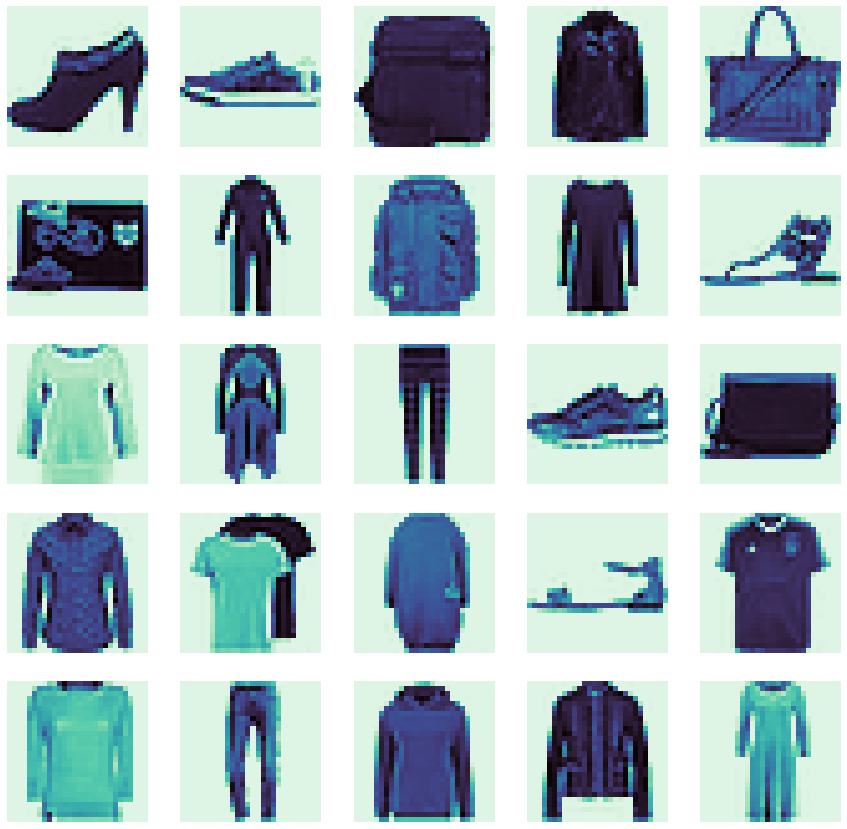

In [63]:
plt.figure(figsize=(15,15)) # specifying the overall grid size

for i in range(25):
    plt.subplot(5,5,i+1)    # the number of images in the grid is 5*5 (25)
    plt.axis('off')
    plt.imshow(X_train[np.random.randint(1, X_train.shape[0])], cmap ='mako_r')
plt.show()

### Adding noise

In [0]:
X_train = X_train/255
X_test = X_test/255

In [0]:
noise_factor = 0.3

noisy_data = []

for img in X_train:
  noisy_img = img + noise_factor*np.random.randn(*img.shape)
  noisy_img = np.clip(noisy_img, 0, 1)
  noisy_data.append(noisy_img)

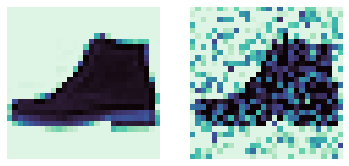

In [60]:
img_train = 42

plt.subplot(1,2,1)
plt.axis('off')
plt.imshow(X_train[img_train], cmap ='mako_r')

plt.subplot(1,2,2)
plt.axis('off')
plt.imshow(noisy_data[img_train], cmap ='mako_r');

plt.show()

In [0]:
noisy_data_test = []

for img in X_test:
  noisy_img = img + noise_factor*np.random.randn(*img.shape)
  noisy_img = np.clip(noisy_img, 0, 1)
  noisy_data_test.append(noisy_img)

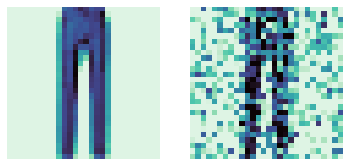

In [62]:
img_test = 24

plt.subplot(1,2,1)
plt.axis('off')
plt.imshow(X_test[img_test], cmap ='mako_r')

plt.subplot(1,2,2)
plt.axis('off')
plt.imshow(noisy_data_test[img_test], cmap ='mako_r');

plt.show()

### Model

In [0]:
autoencoder = tf.keras.models.Sequential()
autoencoder.add(tf.keras.layers.Conv2D(filters =16, kernel_size = 3, strides = 2, padding  = 'same', input_shape = (28,28,1)))
autoencoder.add(tf.keras.layers.Conv2D(filters =8, kernel_size = 3, strides = 2, padding  = 'same'))

autoencoder.add(tf.keras.layers.Conv2D(filters =8, kernel_size = 3, strides = 1, padding  = 'same'))

autoencoder.add(tf.keras.layers.Conv2DTranspose(filters =16, kernel_size = 3, strides = 2, padding  = 'same'))
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters =1, kernel_size = 3, strides = 2,activation='sigmoid', padding  = 'same'))

In [74]:
autoencoder.compile(loss = 'binary_crossentropy', optimizer = tf.keras.optimizers.Adam(lr=0.001))
autoencoder.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 7, 8)           1160      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
conv2d_transpose_4 (Conv2DTr (None, 14, 14, 16)        1168      
_________________________________________________________________
conv2d_transpose_5 (Conv2DTr (None, 28, 28, 1)         145       
Total params: 3,217
Trainable params: 3,217
Non-trainable params: 0
_________________________________________________________________


In [0]:
noisy_data = np.array(noisy_data)
noisy_data_test = np.array(noisy_data_test)

In [78]:
autoencoder.fit(noisy_data.reshape(-1, 28,28,1), X_train.reshape(-1,28,28,1),
                epochs = 10,
                batch_size = 200,
                validation_data = (noisy_data_test.reshape(-1,28,28,1),  X_test.reshape(-1,28,28,1)))

Epoch 1/10
300/300 [==============================] - 15s 50ms/step - loss: 0.3972 - val_loss: 0.3242
Epoch 2/10
300/300 [==============================] - 15s 50ms/step - loss: 0.3160 - val_loss: 0.3145
Epoch 3/10
300/300 [==============================] - 15s 50ms/step - loss: 0.3103 - val_loss: 0.3106
Epoch 4/10
300/300 [==============================] - 15s 51ms/step - loss: 0.3071 - val_loss: 0.3081
Epoch 5/10
300/300 [==============================] - 15s 51ms/step - loss: 0.3047 - val_loss: 0.3059
Epoch 6/10
300/300 [==============================] - 15s 50ms/step - loss: 0.3031 - val_loss: 0.3047
Epoch 7/10
300/300 [==============================] - 15s 50ms/step - loss: 0.3020 - val_loss: 0.3038
Epoch 8/10
300/300 [==============================] - 15s 49ms/step - loss: 0.3012 - val_loss: 0.3029
Epoch 9/10
300/300 [==============================] - 15s 50ms/step - loss: 0.3006 - val_loss: 0.3024
Epoch 10/10
300/300 [==============================] - 15s 49ms/step - loss: 0.300

In [80]:
autoencoder.evaluate(noisy_data_test.reshape(-1,28,28,1),  X_test.reshape(-1,28,28,1))

313/313 [==============================] - 1s 4ms/step - loss: 0.3021


0.30210360884666443

### Prediction

In [0]:
pred = autoencoder.predict(noisy_data_test[:25].reshape(-1, 28,28,1))

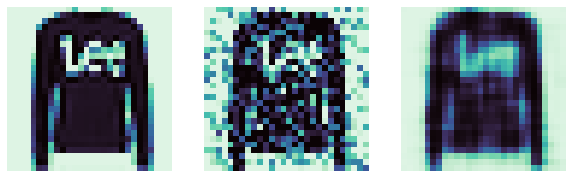

In [107]:
img_test = 1

plt.figure(figsize=(10,10))

plt.subplot(1,3,1)
plt.axis('off')
plt.imshow(X_test[img_test], cmap ='mako_r')

plt.subplot(1,3,2)
plt.axis('off')
plt.imshow(noisy_data_test[img_test], cmap ='mako_r');

plt.subplot(1,3,3)
plt.axis('off')
plt.imshow(pred[img_test].reshape((28,28)), cmap ='mako_r')

plt.show();

### Original Data

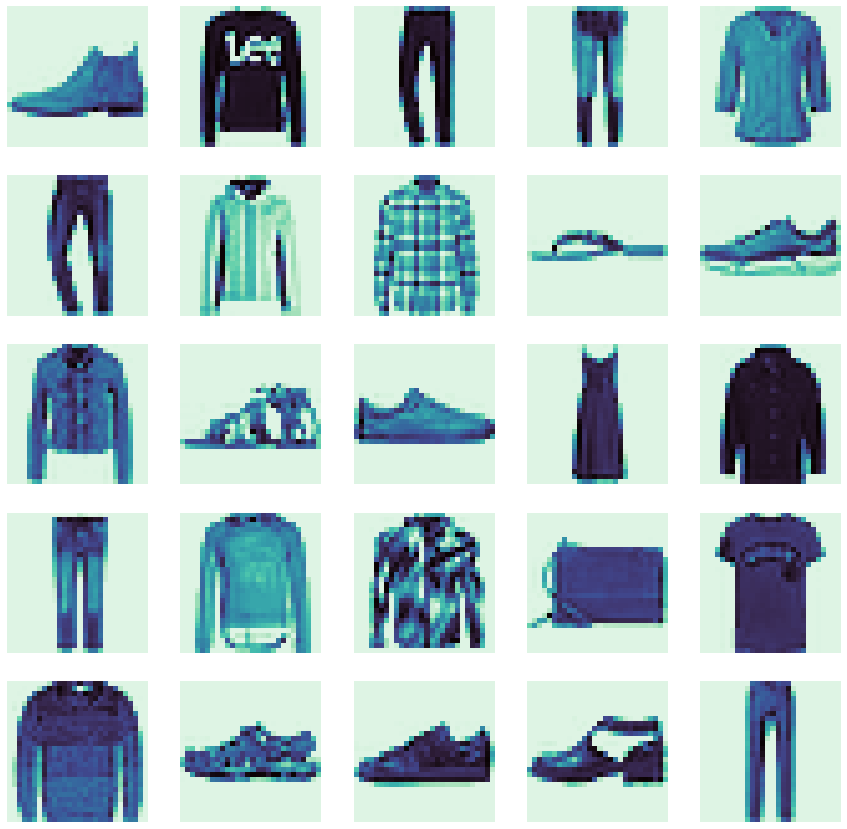

In [106]:
plt.figure(figsize=(15,15))

for img in range(len(pred)):
  plt.subplot(5,5,img+1)
  plt.axis('off')
  plt.imshow(X_test[img].reshape((28,28)), cmap ='mako_r')
plt.show()

### Predicted Images

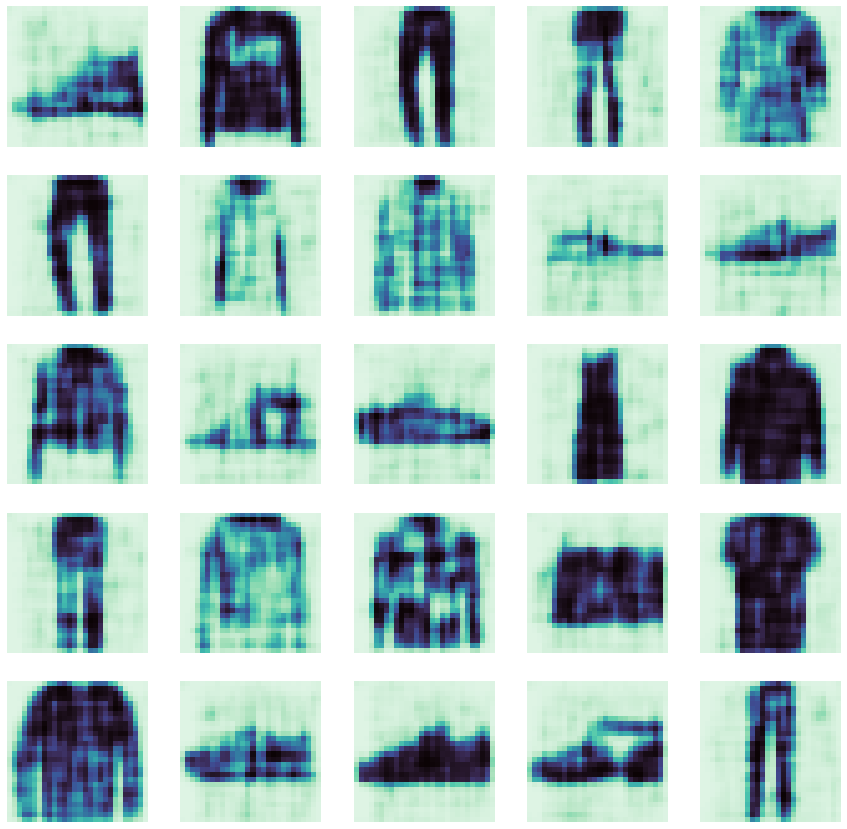

In [99]:
plt.figure(figsize=(15,15))

for img in range(len(pred)):
  plt.subplot(5,5,img+1)
  plt.axis('off')
  plt.imshow(pred[img].reshape((28,28)), cmap ='mako_r')
plt.show()